<a href="https://colab.research.google.com/github/DNAsantanu/ML-Projects/blob/main/Image_classification_using_MLPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Roll No.- MA24M021

## Name - Santanu Das

## installing pytorch and importing the required libraries

In [ ]:
pip install torch torchvision torchaudio


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib inline

### Hyperparameters:(Batch_size,epochs)

In [ ]:
batch_size=100
epochs=150

## Loading the CIFAR-10 dataset from the "torchvision.datasets"

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)

validationset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)
validationloader = torch.utils.data.DataLoader(validationset, batch_size=batch_size,
                                               shuffle=False)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

#### The network consists of three hidden layers: h1 (500 units), h2 (250 units), and h3 (100 units). Use ReLU activation for all hidden layers. And the output layer consists of 10 units, one for each class. And the softmax function is used to obtain class probabilities

In [ ]:
# 2. MLP Model Definition
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32*32*3, 500)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(500, 250)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(250, 100)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(100, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.fc4(x)
        return self.softmax(x)

## here I have used two types of SGD: SGD without nesterov and SGD with nesterov

### Cross Entropy Loss and SGD optimizer without nesterov  AND Training the model

In [ ]:
# loss function and SGD optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# Number of epochs
epochs = epochs
#Training Loop
import time

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Track total training time
total_start_time = time.time()

for epoch in range(epochs):
    epoch_start_time = time.time()  # Start time for this epoch

    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(100 * correct / total)

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in validationloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(validationloader))
    val_accuracies.append(100 * val_correct / val_total)

    # Calculate epoch time
    epoch_end_time = time.time()
    epoch_duration = epoch_end_time - epoch_start_time

    print(f"Epoch {epoch+1}/{epochs} | Time: {epoch_duration:.2f}s | "
          f"Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | "
          f"Train Acc: {train_accuracies[-1]:.2f}% | Val Acc: {val_accuracies[-1]:.2f}%")

# Total training time
total_end_time = time.time()
total_duration = total_end_time - total_start_time
print(f"\nTotal Training Time: {total_duration:.2f} seconds ({total_duration/60:.2f} minutes)")


Epoch 1/150 | Time: 8.52s | Train Loss: 2.2946 | Val Loss: 2.2604 | Train Acc: 17.73% | Val Acc: 19.51%
Epoch 2/150 | Time: 8.14s | Train Loss: 2.2039 | Val Loss: 2.1734 | Train Acc: 24.29% | Val Acc: 27.63%
Epoch 3/150 | Time: 8.43s | Train Loss: 2.1480 | Val Loss: 2.1160 | Train Acc: 31.06% | Val Acc: 34.60%
Epoch 4/150 | Time: 8.53s | Train Loss: 2.0921 | Val Loss: 2.0699 | Train Acc: 36.89% | Val Acc: 38.96%
Epoch 5/150 | Time: 8.90s | Train Loss: 2.0609 | Val Loss: 2.0441 | Train Acc: 39.76% | Val Acc: 41.48%
Epoch 6/150 | Time: 9.16s | Train Loss: 2.0370 | Val Loss: 2.0183 | Train Acc: 42.18% | Val Acc: 44.32%
Epoch 7/150 | Time: 9.40s | Train Loss: 2.0102 | Val Loss: 1.9895 | Train Acc: 45.11% | Val Acc: 47.50%
Epoch 8/150 | Time: 9.47s | Train Loss: 1.9888 | Val Loss: 1.9709 | Train Acc: 47.34% | Val Acc: 49.39%
Epoch 9/150 | Time: 9.50s | Train Loss: 1.9739 | Val Loss: 1.9532 | Train Acc: 48.68% | Val Acc: 51.12%
Epoch 10/150 | Time: 9.60s | Train Loss: 1.9595 | Val Loss: 1.94

#### STEP-1:Evaluation on the Test Set
#### STEP-2: I have used seaborn and matplotlib to plot the training and validation loss(error) over epochs and the corresponding accuracy over training iterations.
#### STEP-3:Confusion Matrix and Random Test Images with predictions

Test Accuracy: 54.10%


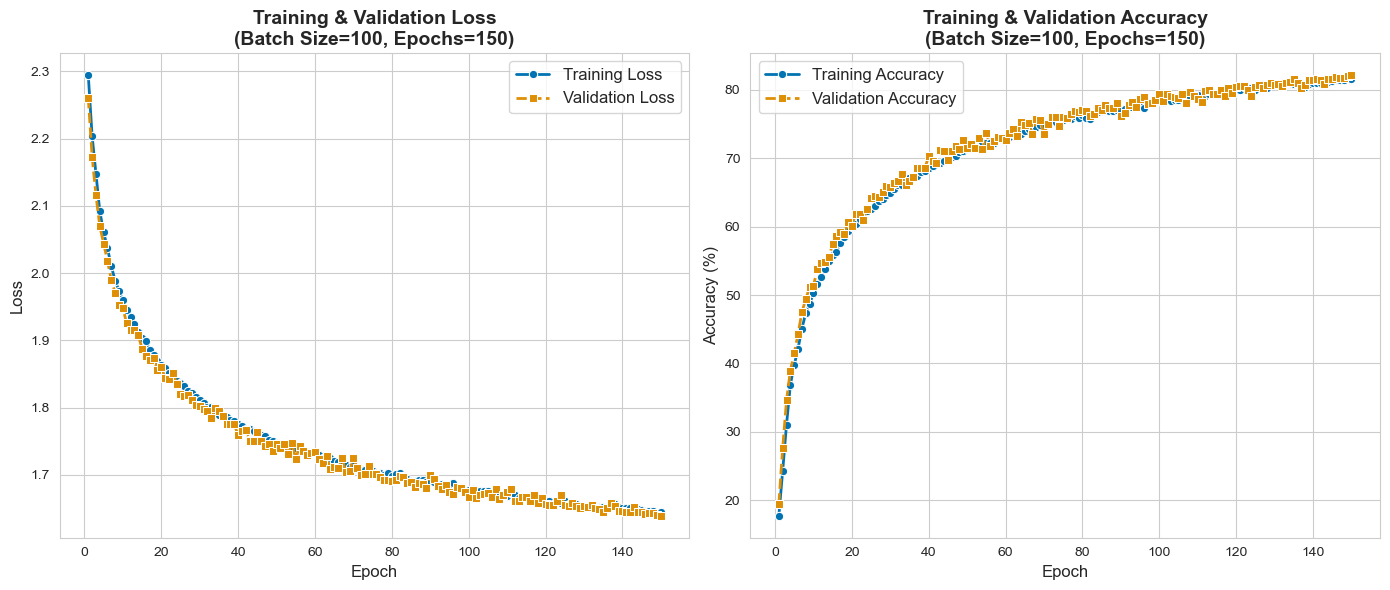

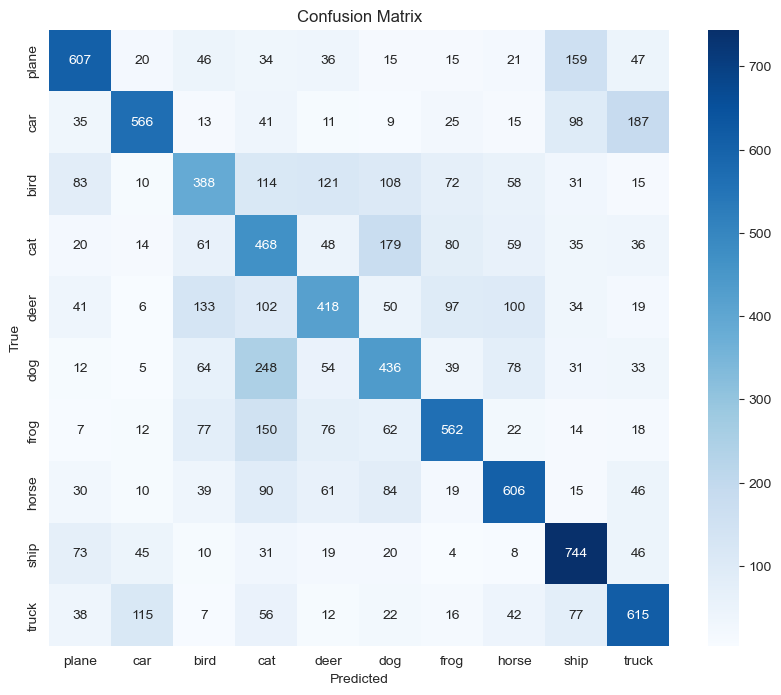

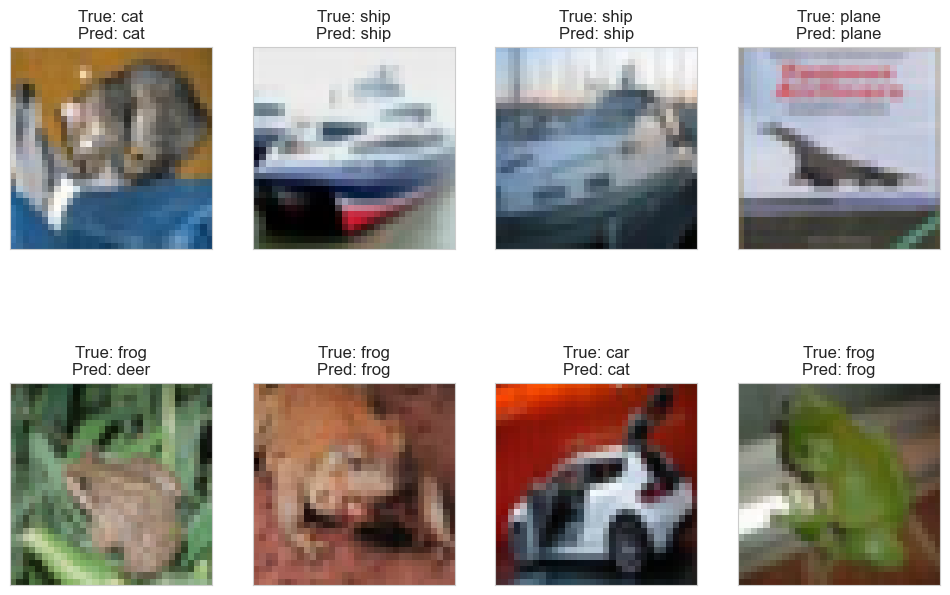

In [ ]:
#STEP-1

# Evaluation on Test Set
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(f"Test Accuracy: {100 * correct / total:.2f}%")

#STEP-2

import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")  # Use a white grid background
sns.set_palette("colorblind")  # Use a colorblind-friendly palette


# Create the plot
plt.figure(figsize=(14, 6))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, len(train_losses) + 1), y=train_losses, label='Training Loss', marker='o', linestyle='-', linewidth=2)
sns.lineplot(x=range(1, len(val_losses) + 1), y=val_losses, label='Validation Loss', marker='s', linestyle='--', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title(f'Training & Validation Loss\n(Batch Size={batch_size}, Epochs={epochs})', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, len(train_accuracies) + 1), y=train_accuracies, label='Training Accuracy', marker='o', linestyle='-', linewidth=2)
sns.lineplot(x=range(1, len(val_accuracies) + 1), y=val_accuracies, label='Validation Accuracy', marker='s', linestyle='--', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title(f'Training & Validation Accuracy\n(Batch Size={batch_size}, Epochs={epochs})', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

#STEP-3

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# 7. Display Random Test Images with Predictions
dataiter = iter(testloader)
images, labels = next(dataiter)

outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)

fig = plt.figure(figsize=(12, 8))
for idx in np.arange(8):
    ax = fig.add_subplot(2, 4, idx+1, xticks=[], yticks=[])
    img = images[idx] / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_title(f"True: {classes[labels[idx]]}\nPred: {classes[predicted[idx]]}")

plt.show()

### Re-set the model's Weights and parameters

In [ ]:
def reset_model_weights(model):
    for layer in model.children():
        if hasattr(layer,'reset_parameters'):
            layer.reset_parameters()


reset_model_weights(model)

## Cross Entropy Loss and SGD optimizer with (nesterov=True)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.01,
    momentum=0.9,
    weight_decay=1e-4,
    nesterov=True
)

import time

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Track total training time
total_start_time = time.time()

for epoch in range(epochs):
    epoch_start_time = time.time()  # Start time for this epoch

    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(100 * correct / total)

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in validationloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(validationloader))
    val_accuracies.append(100 * val_correct / val_total)

    # Calculate epoch time
    epoch_end_time = time.time()
    epoch_duration = epoch_end_time - epoch_start_time

    print(f"Epoch {epoch+1}/{epochs} | Time: {epoch_duration:.2f}s | "
          f"Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | "
          f"Train Acc: {train_accuracies[-1]:.2f}% | Val Acc: {val_accuracies[-1]:.2f}%")

# Total training time
total_end_time = time.time()
total_duration = total_end_time - total_start_time
print(f"\nTotal Training Time: {total_duration:.2f} seconds ({total_duration/60:.2f} minutes)")


Epoch 1/150 | Time: 9.90s | Train Loss: 2.2985 | Val Loss: 2.2842 | Train Acc: 16.63% | Val Acc: 19.94%
Epoch 2/150 | Time: 9.12s | Train Loss: 2.2175 | Val Loss: 2.1769 | Train Acc: 22.67% | Val Acc: 27.00%
Epoch 3/150 | Time: 9.14s | Train Loss: 2.1449 | Val Loss: 2.1093 | Train Acc: 31.52% | Val Acc: 35.40%
Epoch 4/150 | Time: 9.77s | Train Loss: 2.0893 | Val Loss: 2.0663 | Train Acc: 37.03% | Val Acc: 39.44%
Epoch 5/150 | Time: 10.07s | Train Loss: 2.0600 | Val Loss: 2.0392 | Train Acc: 39.94% | Val Acc: 42.38%
Epoch 6/150 | Time: 10.16s | Train Loss: 2.0367 | Val Loss: 2.0187 | Train Acc: 42.33% | Val Acc: 44.52%
Epoch 7/150 | Time: 10.20s | Train Loss: 2.0146 | Val Loss: 1.9986 | Train Acc: 44.72% | Val Acc: 46.49%
Epoch 8/150 | Time: 10.47s | Train Loss: 1.9953 | Val Loss: 1.9803 | Train Acc: 46.68% | Val Acc: 48.22%
Epoch 9/150 | Time: 10.53s | Train Loss: 1.9787 | Val Loss: 1.9627 | Train Acc: 48.34% | Val Acc: 50.04%
Epoch 10/150 | Time: 10.56s | Train Loss: 1.9625 | Val Loss

#### STEP-1:Evaluation on the Test Set
#### STEP-2: I have used seaborn and matplotlib to plot the training and validation loss(error) over epochs and the corresponding accuracy over training iterations.
#### STEP-3:Confusion Matrix and Random Test Images with predictions

Test Accuracy: 55.55%


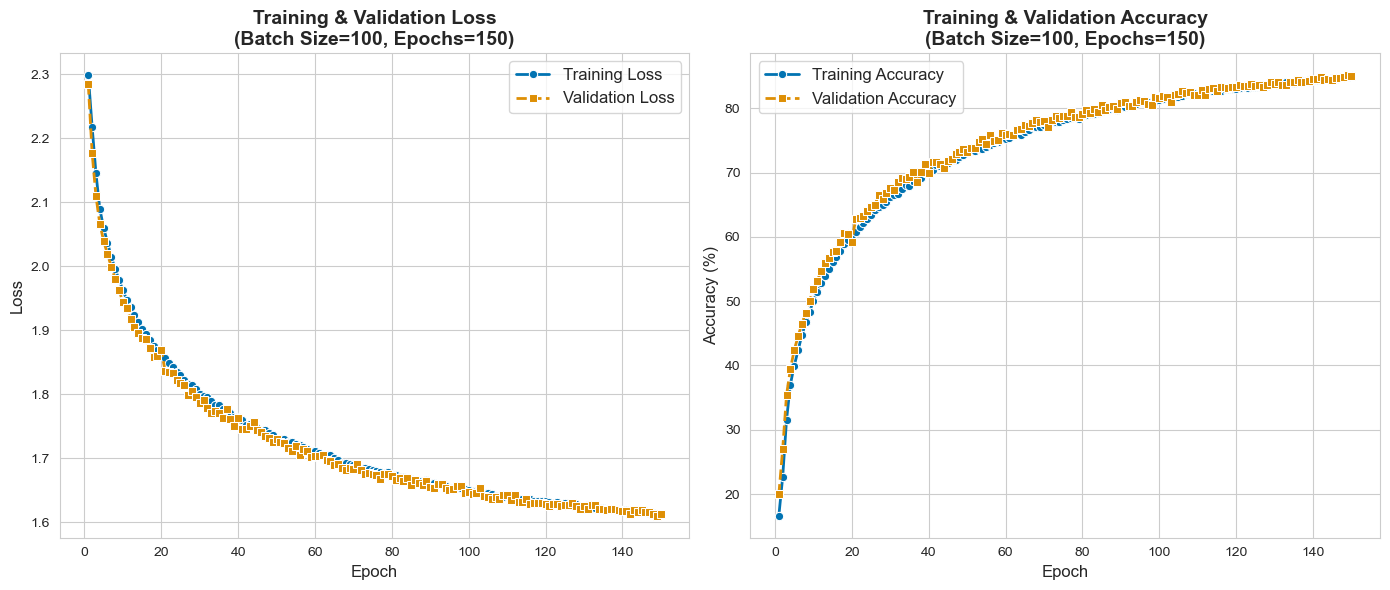

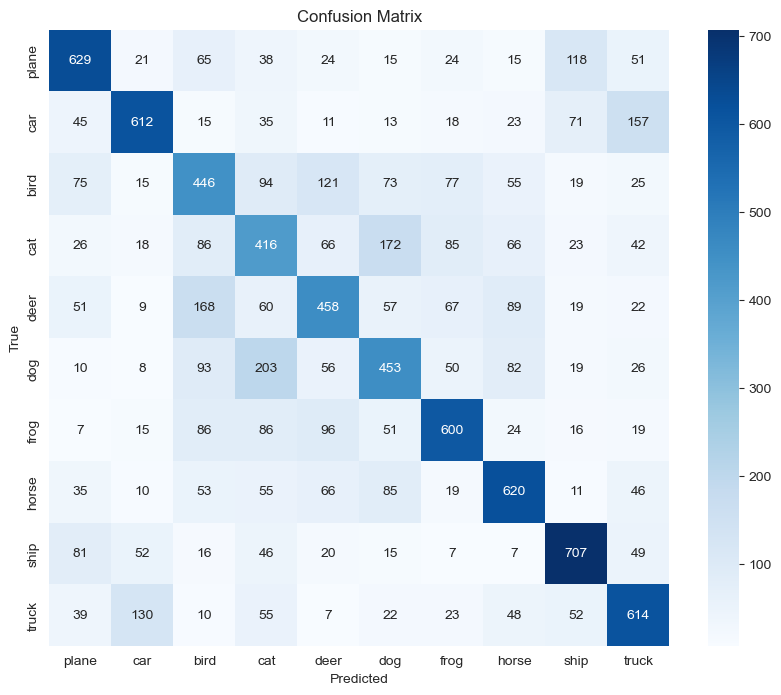

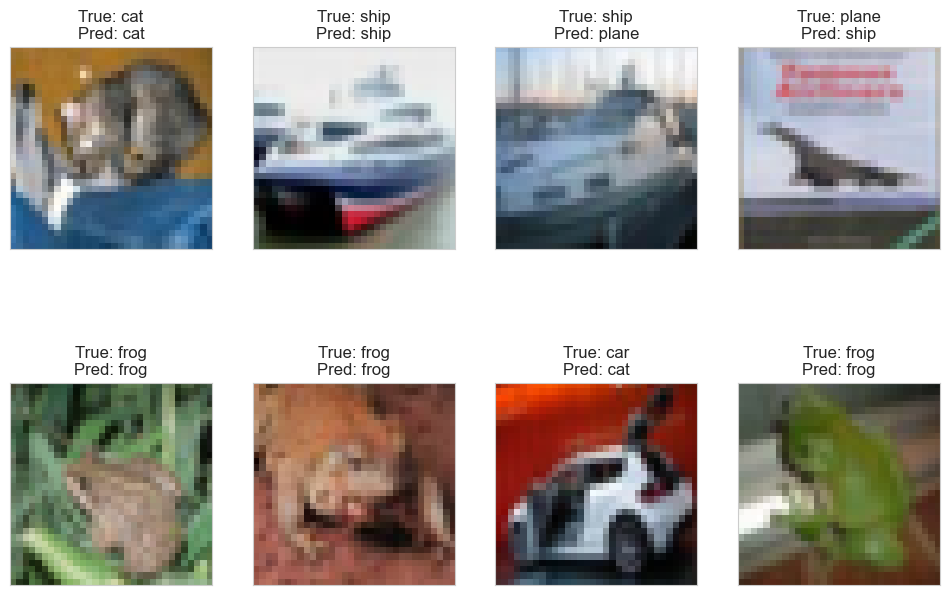

In [ ]:
#STEP-1

# Evaluation on Test Set
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(f"Test Accuracy: {100 * correct / total:.2f}%")

#STEP-2

import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")  # Use a white grid background
sns.set_palette("colorblind")  # Use a colorblind-friendly palette


# Create the plot
plt.figure(figsize=(14, 6))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, len(train_losses) + 1), y=train_losses, label='Training Loss', marker='o', linestyle='-', linewidth=2)
sns.lineplot(x=range(1, len(val_losses) + 1), y=val_losses, label='Validation Loss', marker='s', linestyle='--', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title(f'Training & Validation Loss\n(Batch Size={batch_size}, Epochs={epochs})', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, len(train_accuracies) + 1), y=train_accuracies, label='Training Accuracy', marker='o', linestyle='-', linewidth=2)
sns.lineplot(x=range(1, len(val_accuracies) + 1), y=val_accuracies, label='Validation Accuracy', marker='s', linestyle='--', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title(f'Training & Validation Accuracy\n(Batch Size={batch_size}, Epochs={epochs})', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

#STEP-3

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# 7. Display Random Test Images with Predictions
dataiter = iter(testloader)
images, labels = next(dataiter)

outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)

fig = plt.figure(figsize=(12, 8))
for idx in np.arange(8):
    ax = fig.add_subplot(2, 4, idx+1, xticks=[], yticks=[])
    img = images[idx] / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_title(f"True: {classes[labels[idx]]}\nPred: {classes[predicted[idx]]}")

plt.show()

## Below is the markdown cell it shows the output of the above cell in case you are running the above cell you will get this loss and accuracy curve

![output4.png](attachment:image.png)

### Re-set the model's Weights and parameters

In [ ]:
def reset_model_weights(model):
    for layer in model.children():
        if hasattr(layer,'reset_parameters'):
            layer.reset_parameters()


reset_model_weights(model)

# Using Batch normalization and re-defined the MLP model

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32*32*3, 500)
        self.bn1 = nn.BatchNorm1d(500)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(500, 250)
        self.bn2 = nn.BatchNorm1d(250)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(250, 100)
        self.bn3 = nn.BatchNorm1d(100)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(100, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.bn1(self.fc1(x)))
        x = self.relu2(self.bn2(self.fc2(x)))
        x = self.relu3(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return self.softmax(x)

## here I have used two types of SGD: SGD without nesterov and SGD with nesterov

### 1.Cross Entropy Loss and SGD optimizer without nesterov  AND Training the model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.01,
    momentum=0.9,
    weight_decay=1e-4,
    nesterov=True
)

import time

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Track total training time
total_start_time = time.time()

for epoch in range(epochs):
    epoch_start_time = time.time()  # Start time for this epoch

    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(100 * correct / total)

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in validationloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(validationloader))
    val_accuracies.append(100 * val_correct / val_total)

    # Calculate epoch time
    epoch_end_time = time.time()
    epoch_duration = epoch_end_time - epoch_start_time

    print(f"Epoch {epoch+1}/{epochs} | Time: {epoch_duration:.2f}s | "
          f"Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | "
          f"Train Acc: {train_accuracies[-1]:.2f}% | Val Acc: {val_accuracies[-1]:.2f}%")

# Total training time
total_end_time = time.time()
total_duration = total_end_time - total_start_time
print(f"\nTotal Training Time: {total_duration:.2f} seconds ({total_duration/60:.2f} minutes)")


Epoch 1/150 | Time: 10.19s | Train Loss: 2.1036 | Val Loss: 2.0163 | Train Acc: 37.88% | Val Acc: 46.13%
Epoch 2/150 | Time: 10.14s | Train Loss: 2.0032 | Val Loss: 1.9561 | Train Acc: 46.84% | Val Acc: 51.84%
Epoch 3/150 | Time: 10.45s | Train Loss: 1.9616 | Val Loss: 1.9236 | Train Acc: 50.76% | Val Acc: 54.65%
Epoch 4/150 | Time: 10.65s | Train Loss: 1.9346 | Val Loss: 1.9030 | Train Acc: 53.30% | Val Acc: 56.90%
Epoch 5/150 | Time: 10.71s | Train Loss: 1.9112 | Val Loss: 1.8830 | Train Acc: 55.75% | Val Acc: 58.65%
Epoch 6/150 | Time: 11.28s | Train Loss: 1.8933 | Val Loss: 1.8670 | Train Acc: 57.44% | Val Acc: 60.14%
Epoch 7/150 | Time: 10.98s | Train Loss: 1.8791 | Val Loss: 1.8446 | Train Acc: 58.79% | Val Acc: 62.58%
Epoch 8/150 | Time: 11.06s | Train Loss: 1.8601 | Val Loss: 1.8286 | Train Acc: 60.81% | Val Acc: 64.00%
Epoch 9/150 | Time: 11.23s | Train Loss: 1.8480 | Val Loss: 1.8131 | Train Acc: 61.97% | Val Acc: 65.66%
Epoch 10/150 | Time: 11.15s | Train Loss: 1.8351 | Val 

#### STEP-1:Evaluation on the Test Set
#### STEP-2: I have used seaborn and matplotlib to plot the training and validation loss(error) over epochs and the corresponding accuracy over training iterations.
#### STEP-3:Confusion Matrix and Random Test Images with predictions

Test Accuracy: 55.11%


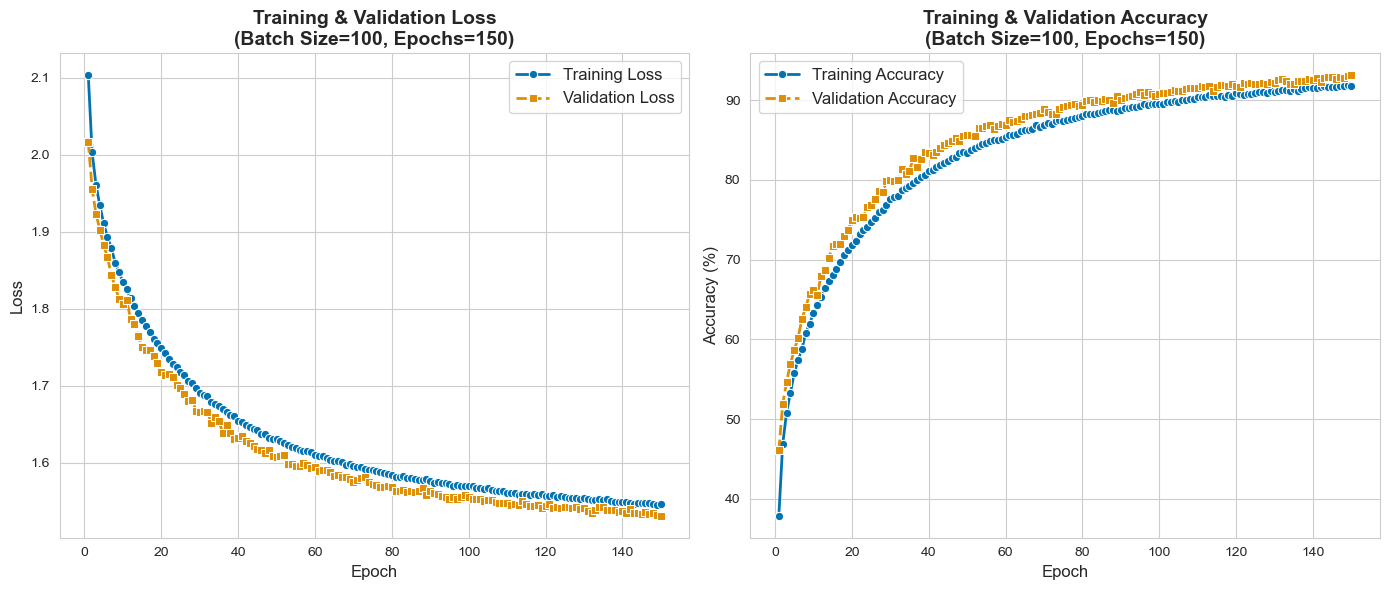

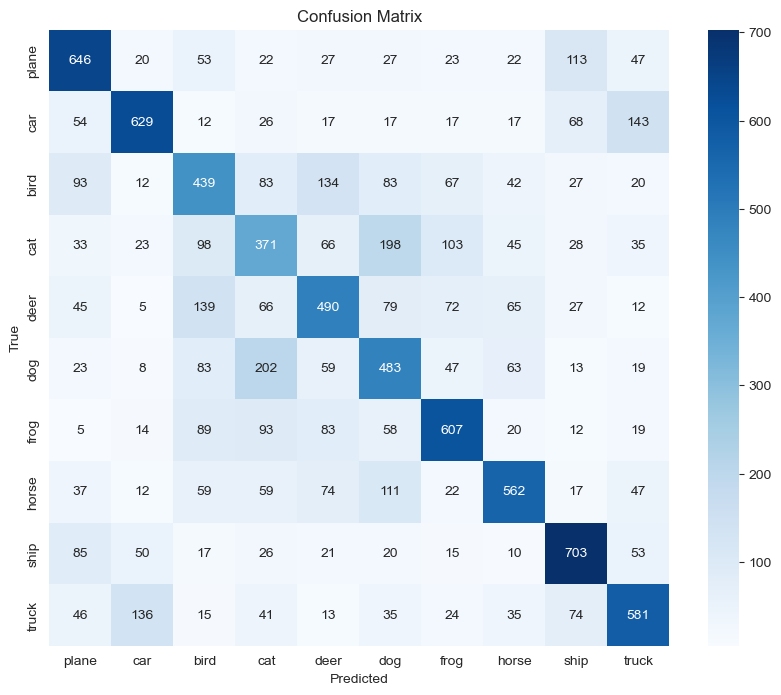

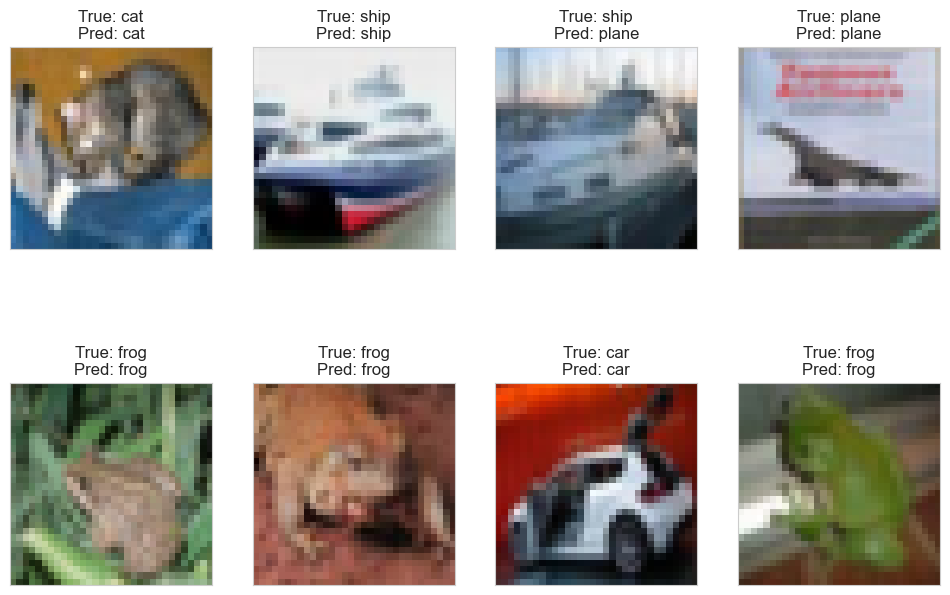

In [ ]:
#STEP-1

# Evaluation on Test Set
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(f"Test Accuracy: {100 * correct / total:.2f}%")

#STEP-2

import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")  # Use a white grid background
sns.set_palette("colorblind")  # Use a colorblind-friendly palette


# Create the plot
plt.figure(figsize=(14, 6))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, len(train_losses) + 1), y=train_losses, label='Training Loss', marker='o', linestyle='-', linewidth=2)
sns.lineplot(x=range(1, len(val_losses) + 1), y=val_losses, label='Validation Loss', marker='s', linestyle='--', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title(f'Training & Validation Loss\n(Batch Size={batch_size}, Epochs={epochs})', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, len(train_accuracies) + 1), y=train_accuracies, label='Training Accuracy', marker='o', linestyle='-', linewidth=2)
sns.lineplot(x=range(1, len(val_accuracies) + 1), y=val_accuracies, label='Validation Accuracy', marker='s', linestyle='--', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title(f'Training & Validation Accuracy\n(Batch Size={batch_size}, Epochs={epochs})', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

#STEP-3

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# 7. Display Random Test Images with Predictions
dataiter = iter(testloader)
images, labels = next(dataiter)

outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)

fig = plt.figure(figsize=(12, 8))
for idx in np.arange(8):
    ax = fig.add_subplot(2, 4, idx+1, xticks=[], yticks=[])
    img = images[idx] / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_title(f"True: {classes[labels[idx]]}\nPred: {classes[predicted[idx]]}")

plt.show()

### Re-set the model's Weights and parameters

In [ ]:
def reset_model_weights(model):
    for layer in model.children():
        if hasattr(layer,'reset_parameters'):
            layer.reset_parameters()


reset_model_weights(model)

### 2. Cross Entropy Loss and SGD optimizer with (nesterov=True)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.01,
    momentum=0.9,
    weight_decay=1e-4,
    nesterov=True
)

import time

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Track total training time
total_start_time = time.time()

for epoch in range(epochs):  # Number of epochs
    epoch_start_time = time.time()  # Start time for this epoch

    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(100 * correct / total)

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in validationloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(validationloader))
    val_accuracies.append(100 * val_correct / val_total)

    # Calculate epoch time
    epoch_end_time = time.time()
    epoch_duration = epoch_end_time - epoch_start_time

    print(f"Epoch {epoch+1}/{epochs} | Time: {epoch_duration:.2f}s | "
          f"Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | "
          f"Train Acc: {train_accuracies[-1]:.2f}% | Val Acc: {val_accuracies[-1]:.2f}%")

# Total training time
total_end_time = time.time()
total_duration = total_end_time - total_start_time
print(f"\nTotal Training Time: {total_duration:.2f} seconds ({total_duration/60:.2f} minutes)")


Epoch 1/150 | Time: 10.44s | Train Loss: 2.1087 | Val Loss: 2.0225 | Train Acc: 36.84% | Val Acc: 45.21%
Epoch 2/150 | Time: 10.26s | Train Loss: 2.0123 | Val Loss: 1.9691 | Train Acc: 45.56% | Val Acc: 50.27%
Epoch 3/150 | Time: 10.90s | Train Loss: 1.9681 | Val Loss: 1.9360 | Train Acc: 50.17% | Val Acc: 53.68%
Epoch 4/150 | Time: 10.87s | Train Loss: 1.9390 | Val Loss: 1.9099 | Train Acc: 52.96% | Val Acc: 56.10%
Epoch 5/150 | Time: 11.03s | Train Loss: 1.9168 | Val Loss: 1.8777 | Train Acc: 55.26% | Val Acc: 59.35%
Epoch 6/150 | Time: 11.10s | Train Loss: 1.8961 | Val Loss: 1.8644 | Train Acc: 57.33% | Val Acc: 60.40%
Epoch 7/150 | Time: 11.27s | Train Loss: 1.8802 | Val Loss: 1.8464 | Train Acc: 58.70% | Val Acc: 62.12%
Epoch 8/150 | Time: 11.34s | Train Loss: 1.8646 | Val Loss: 1.8304 | Train Acc: 60.32% | Val Acc: 63.86%
Epoch 9/150 | Time: 11.28s | Train Loss: 1.8522 | Val Loss: 1.8297 | Train Acc: 61.55% | Val Acc: 63.93%
Epoch 10/150 | Time: 11.53s | Train Loss: 1.8399 | Val 

#### STEP-1:Evaluation on the Test Set
#### STEP-2: I have used seaborn and matplotlib to plot the training and validation loss(error) over epochs and the corresponding accuracy over training iterations.
#### STEP-3:Confusion Matrix and Random Test Images with predictions

Test Accuracy: 55.38%


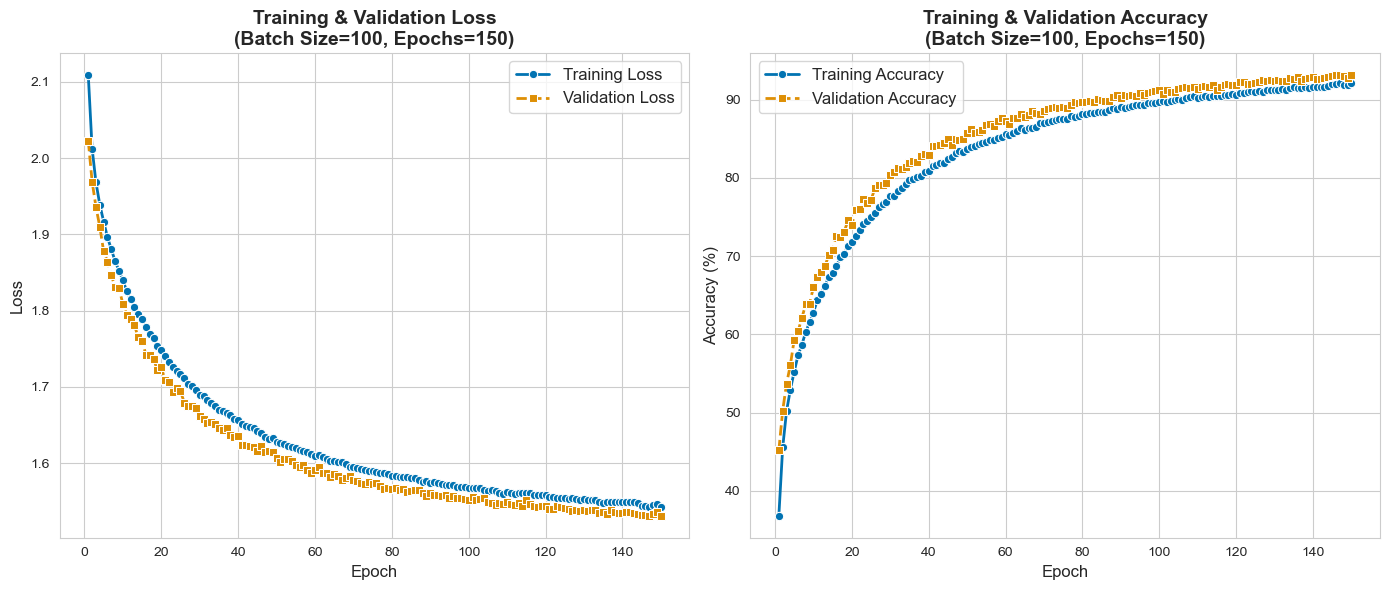

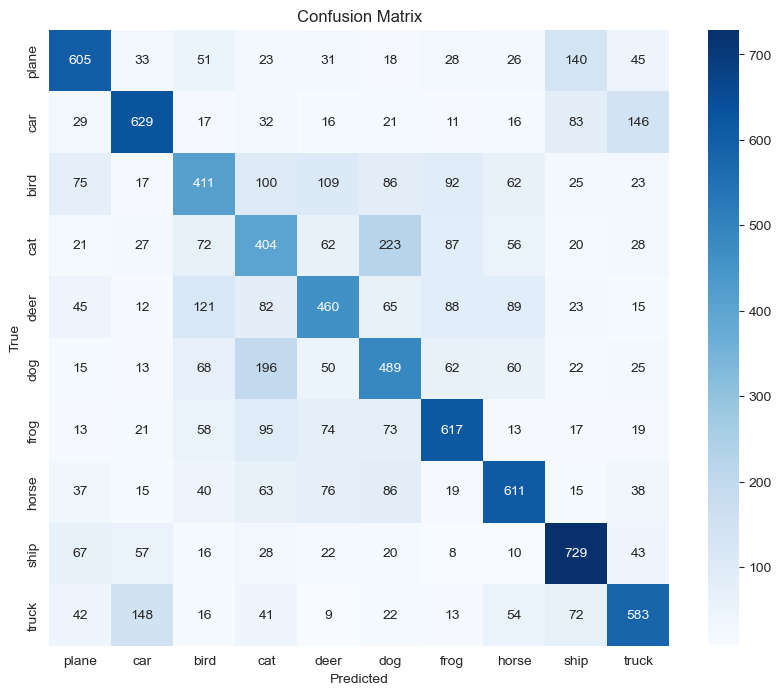

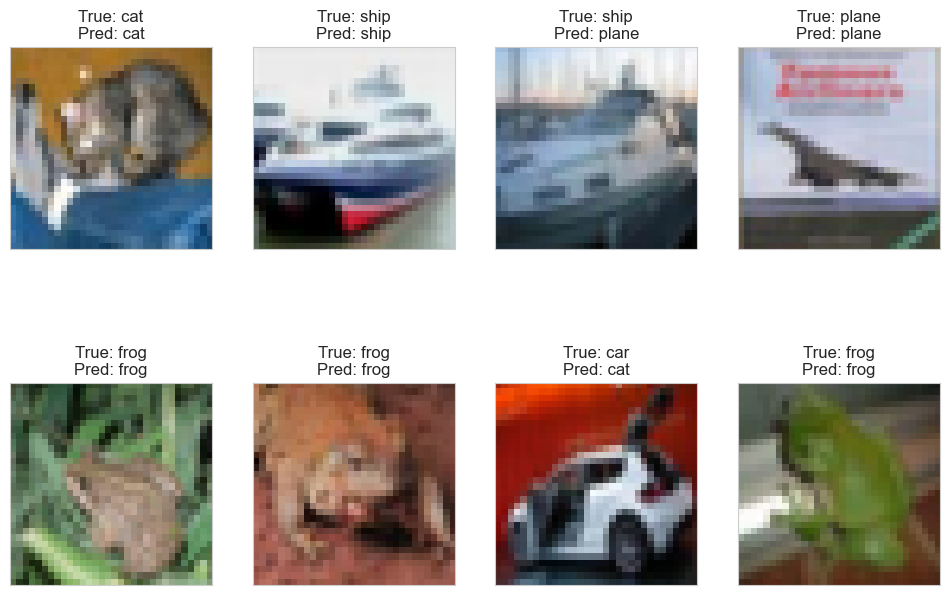

In [ ]:
#STEP-1

# Evaluation on Test Set
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(f"Test Accuracy: {100 * correct / total:.2f}%")

#STEP-2

import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")  # Use a white grid background
sns.set_palette("colorblind")  # Use a colorblind-friendly palette


# Create the plot
plt.figure(figsize=(14, 6))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, len(train_losses) + 1), y=train_losses, label='Training Loss', marker='o', linestyle='-', linewidth=2)
sns.lineplot(x=range(1, len(val_losses) + 1), y=val_losses, label='Validation Loss', marker='s', linestyle='--', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title(f'Training & Validation Loss\n(Batch Size={batch_size}, Epochs={epochs})', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, len(train_accuracies) + 1), y=train_accuracies, label='Training Accuracy', marker='o', linestyle='-', linewidth=2)
sns.lineplot(x=range(1, len(val_accuracies) + 1), y=val_accuracies, label='Validation Accuracy', marker='s', linestyle='--', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title(f'Training & Validation Accuracy\n(Batch Size={batch_size}, Epochs={epochs})', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

#STEP-3

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# 7. Display Random Test Images with Predictions
dataiter = iter(testloader)
images, labels = next(dataiter)

outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)

fig = plt.figure(figsize=(12, 8))
for idx in np.arange(8):
    ax = fig.add_subplot(2, 4, idx+1, xticks=[], yticks=[])
    img = images[idx] / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_title(f"True: {classes[labels[idx]]}\nPred: {classes[predicted[idx]]}")

plt.show()

### Re-set the model's Weights and parameters

In [ ]:
def reset_model_weights(model):
    for layer in model.children():
        if hasattr(layer,'reset_parameters'):
            layer.reset_parameters()


reset_model_weights(model)

#### I have used some particular values of hyperparameters for the above MLP model and those are learning rate = 0.01 , batch size = 100, number of epochs = 150. And also i have used two optimizer -- 1. without Nesterov and 2. with Nesterov, (It is called Nesterov accelerated gradient descent, in the update rule, follows look ahead method, compute the gradient for the next step and use it in the update rule. And also helps to converges fast, we can notice the training time.)
  
* After running the above model the best Test accuracy is for without batch normalization and with Nesterov(55.55%) for the above set of hyperparameters. It could change if the hyperparameters are choosen carefully.  